In [2]:
import datetime
import json
import pandas as pd

# Read sleep segment data from file
data = pd.read_json("..\Fit\All Data\derived_com.google.sleep.segment_com.google.an.json")
sleep_segments = data["Data Points"]

# Convert Epoch time to datetime objects and adjust dates
for segment in sleep_segments:
    start_time = datetime.datetime.fromtimestamp(int(segment["startTimeNanos"]) / 1e9)
    end_time = datetime.datetime.fromtimestamp(int(segment["endTimeNanos"]) / 1e9)
    if end_time.hour >= 16:
        segment_date = end_time.date()
    else:
        segment_date = start_time.date()
    segment["start_time"] = start_time
    segment["end_time"] = end_time
    segment["date"] = segment_date

# Calculate duration of each sleep segment in hours
for segment in sleep_segments:
    duration = (segment["end_time"] - segment["start_time"]).total_seconds() / 3600
    segment["duration"] = duration

# Group sleep segments by date and sum durations
totals = {}
for segment in sleep_segments:
    date = segment["date"]
    if date not in totals:
        totals[date] = 0
    totals[date] += segment["duration"]

# Create a pandas DataFrame with date and hours slept
df = pd.DataFrame({"Date": sorted(totals.keys()), "Hours Slept": [totals[date] for date in sorted(totals.keys())]})

# Add 24 hours to the total if the date corresponds to the previous day
if df.shape[0] > 1:
    if df.iloc[0]["Date"] == df.iloc[1]["Date"] - datetime.timedelta(days=1):
        df.iloc[0, 1] += df.iloc[1, 1]
        df = df.iloc[1:]

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

print(df)

            Date  Hours Slept
0     2019-07-29     8.016667
1     2019-07-30     9.933333
2     2019-07-31     6.883333
3     2019-08-01     1.800000
4     2019-08-02     6.291667
...          ...          ...
1042  2023-04-27     7.366666
1043  2023-04-28     8.933334
1044  2023-04-29     9.750000
1045  2023-04-30     1.566663
1046  2023-05-01     7.449982

[1047 rows x 2 columns]


In [3]:
df

,Date,Hours Slept
0,2019-07-29,8.016667
1,2019-07-30,9.933333
2,2019-07-31,6.883333
3,2019-08-01,1.800000
4,2019-08-02,6.291667
...,...,...
1042,2023-04-27,7.366666
1043,2023-04-28,8.933334
1044,2023-04-29,9.750000
1045,2023-04-30,1.566663


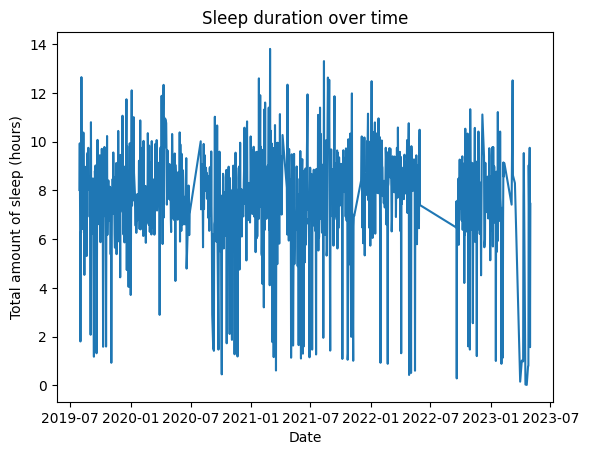

In [4]:
import matplotlib.pyplot as plt

# Plot the date vs the total amount of sleep
plt.plot(df['Date'], df['Hours Slept'])

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Total amount of sleep (hours)')
plt.title('Sleep duration over time')

# Display the plot
plt.show()

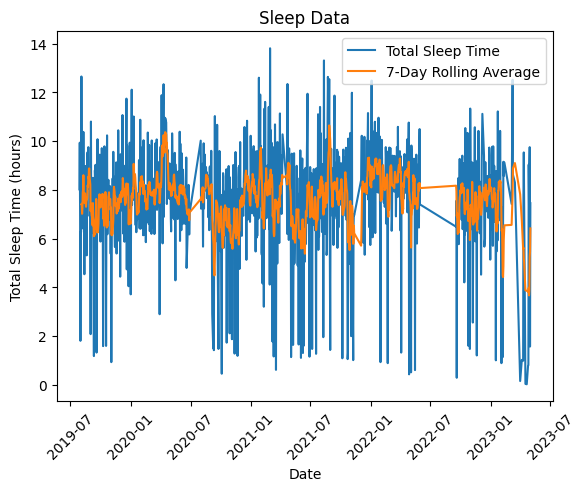

In [5]:
# Calculate the 7-day rolling average of total sleep time
df["Rolling Average"] = df["Hours Slept"].rolling(window=7).mean()

# Plot the date vs. total sleep time and rolling average
fig, ax = plt.subplots()
ax.plot(df["Date"], df["Hours Slept"], label="Total Sleep Time")
ax.plot(df["Date"], df["Rolling Average"], label="7-Day Rolling Average")
ax.set(xlabel="Date", ylabel="Total Sleep Time (hours)", title="Sleep Data")
ax.legend()
plt.xticks(rotation=45)
plt.show()

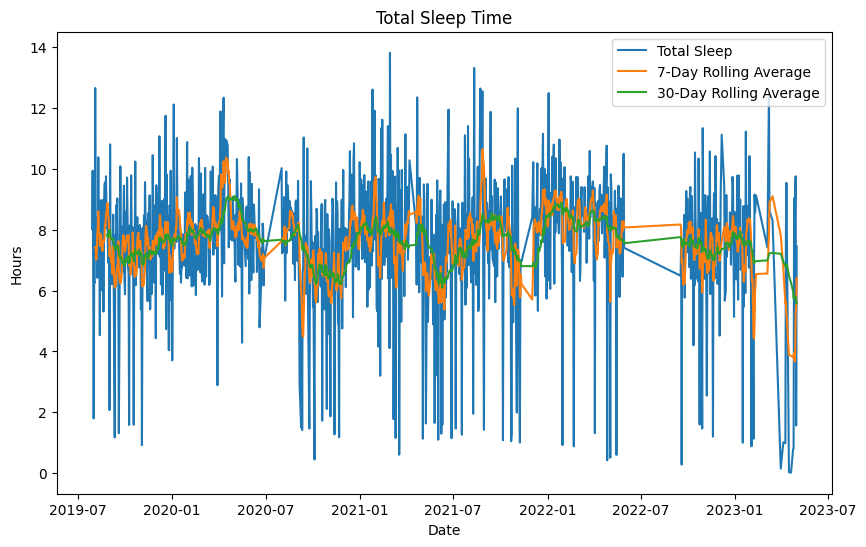

In [6]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Plot total sleep time and rolling averages
plt.plot(df["Date"], df["Hours Slept"], label="Total Sleep")
plt.plot(df["Date"], df["Hours Slept"].rolling(window=7).mean(), label="7-Day Rolling Average")
plt.plot(df["Date"], df["Hours Slept"].rolling(window=30).mean(), label="30-Day Rolling Average")

# Set title and axis labels
plt.title("Total Sleep Time")
plt.xlabel("Date")
plt.ylabel("Hours")

# Add legend
plt.legend()

# Show plot
plt.show()

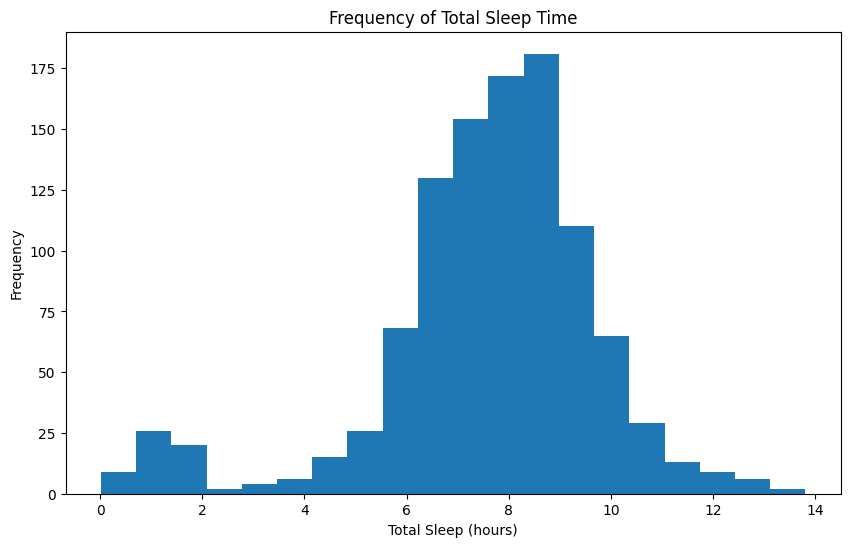

In [7]:
import matplotlib.pyplot as plt

# Filter data by excluding values with less than 4 hours of total sleep
df_filtered = df

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram of Total Sleep data
plt.hist(df_filtered["Hours Slept"], bins=20)

# Set title and axis labels
plt.title("Frequency of Total Sleep Time")
plt.xlabel("Total Sleep (hours)")
plt.ylabel("Frequency")

# Show plot
plt.show()

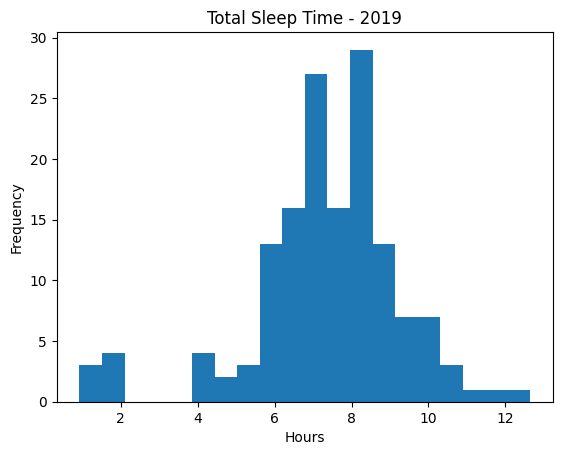

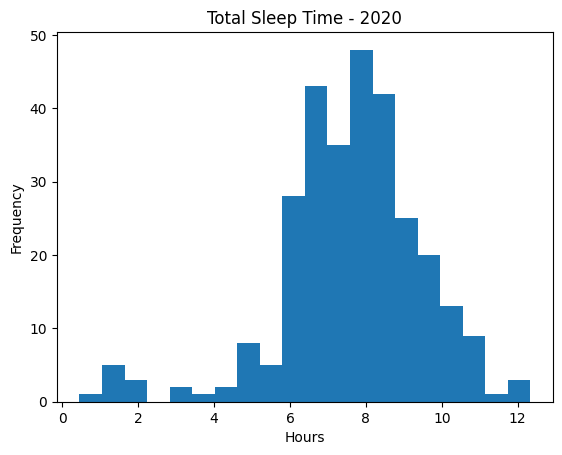

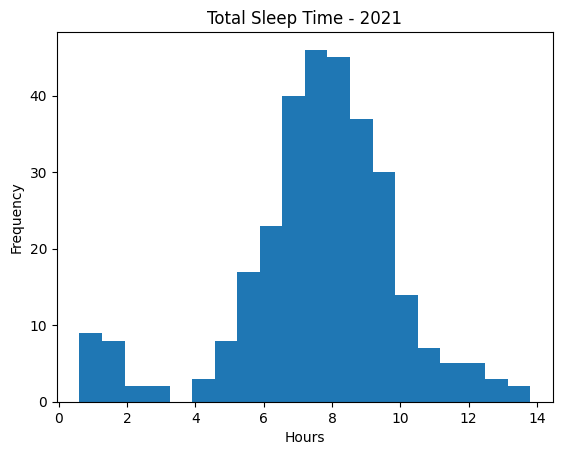

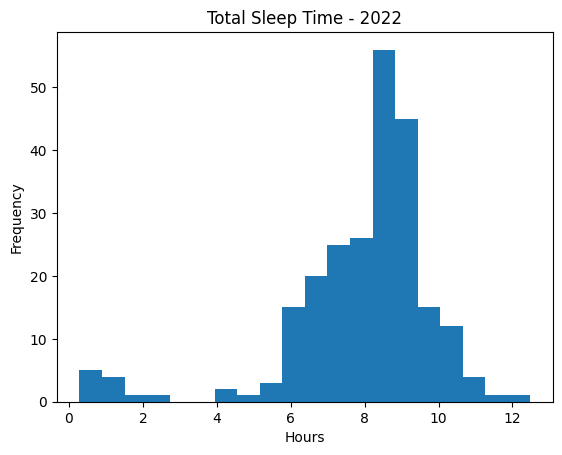

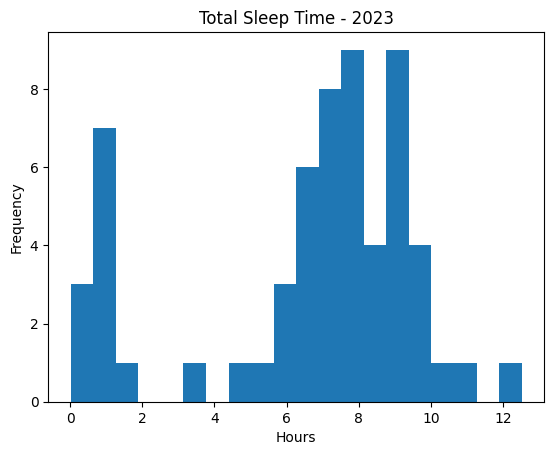

In [8]:
import matplotlib.pyplot as plt

# Convert "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Group data by year
grouped = df.groupby(df["Date"].dt.year)

# Plot histograms for each year
for year, group in grouped:
    plt.figure()
    plt.hist(group["Hours Slept"], bins=20)
    plt.title(f"Total Sleep Time - {year}")
    plt.xlabel("Hours")
    plt.ylabel("Frequency")
    plt.show()

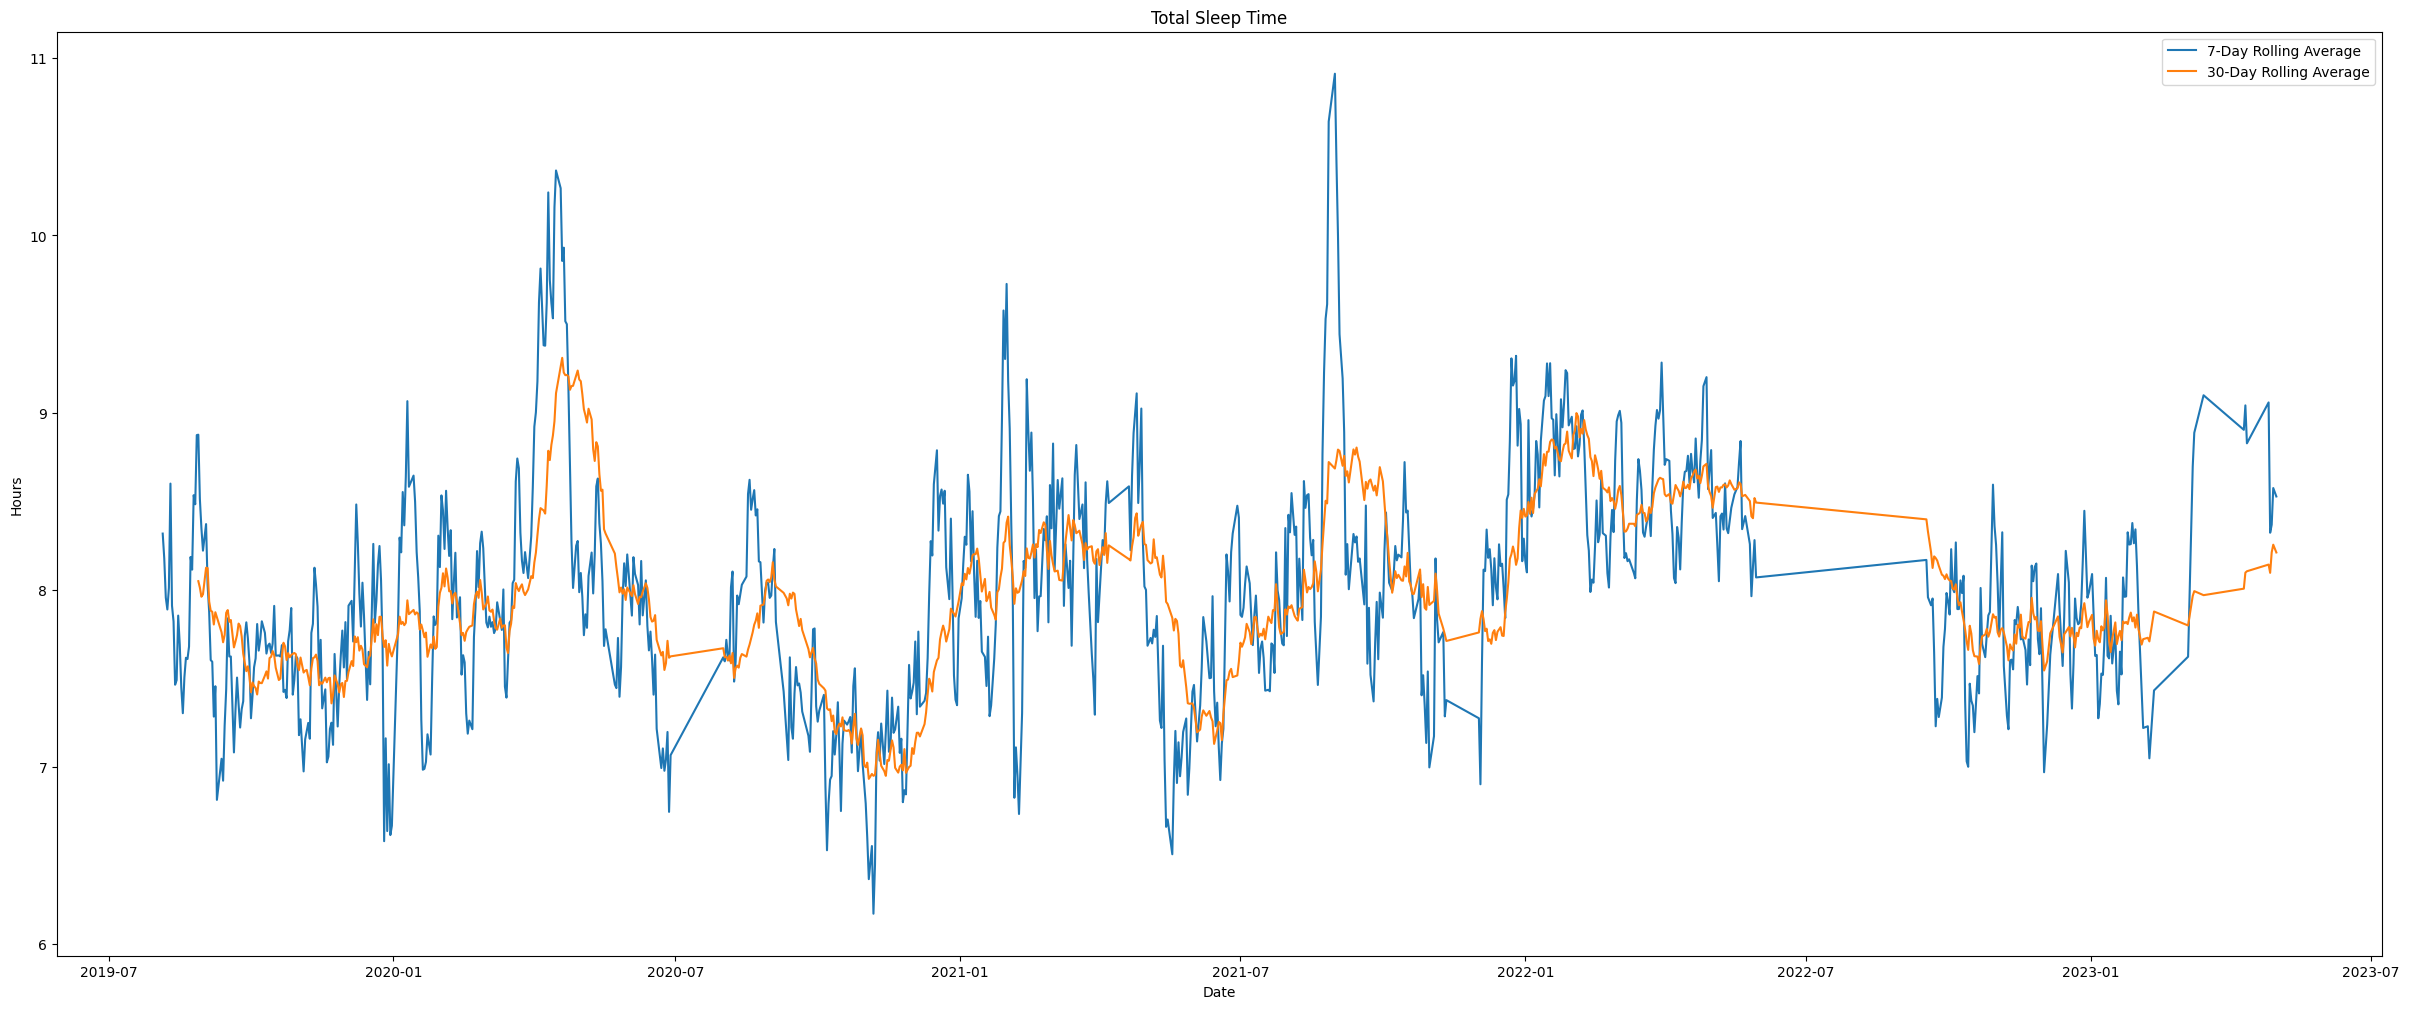

In [11]:
import matplotlib.pyplot as plt

# Filter data by excluding nights with less than 4 hours of sleep
df_filtered = df.query("`Hours Slept` >= 4")

# Set figure size
plt.figure(figsize=(30, 12))

# Plot total sleep time and rolling averages
# plt.plot(df_filtered["Date"], df_filtered["Hours Slept"], label="Total Sleep")
plt.plot(df_filtered["Date"], df_filtered["Hours Slept"].rolling(window=7).mean(), label="7-Day Rolling Average")
plt.plot(df_filtered["Date"], df_filtered["Hours Slept"].rolling(window=30).mean(), label="30-Day Rolling Average")

# Set title and axis labels
plt.title("Total Sleep Time")
plt.xlabel("Date")
plt.ylabel("Hours")

# Add legend
plt.legend()

# Show plot
plt.show()
